In [ ]:
import pandas as pd

In [ ]:
holidays = pd.read_csv('holidays_events.csv')
holidays.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


In [ ]:
trans = pd.read_csv('transactions.csv')
trans.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [ ]:
test = pd.read_csv('test.csv')
test.head()

,id,date,store_nbr,item_nbr,onpromotion
0,125497040,2017-08-16,1,96995,False
1,125497041,2017-08-16,1,99197,False
2,125497042,2017-08-16,1,103501,False
3,125497043,2017-08-16,1,103520,False
4,125497044,2017-08-16,1,103665,False


PART 1 : JOINING HOLIDAYS AND TRANSACTIONS TO SEE RATE OF TRANSACTIONS COINCIDING WITH HOLIDAYS


In [ ]:
holidays.loc[(holidays['type'] == 'Bridge') | (holidays['type'] == 'Additional'), 'type'] = 'Holiday'

In [ ]:
holidays = holidays[holidays['type'].isin(['Holiday', 'Event'])]

In [ ]:
holidays['date'] = pd.to_datetime(holidays['date'])
trans['date'] = pd.to_datetime(trans['date'])

In [ ]:
df = pd.merge(
    left=holidays,
    right=trans,
    left_on=['date'],
    right_on=['date'],
    how='left'
)

In [ ]:
df.isna().sum()

date             0
type             0
locale           0
locale_name      0
description      0
transferred      0
store_nbr       66
transactions    66
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.head()

,date,type,locale,locale_name,description,transferred,store_nbr,transactions
40,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False,25.0,770.0
41,2013-02-11,Holiday,National,Ecuador,Carnaval,False,1.0,396.0
42,2013-02-11,Holiday,National,Ecuador,Carnaval,False,2.0,1486.0
43,2013-02-11,Holiday,National,Ecuador,Carnaval,False,3.0,2532.0
44,2013-02-11,Holiday,National,Ecuador,Carnaval,False,4.0,1263.0


YEAR: **2013**
HOLIDAYS

city level

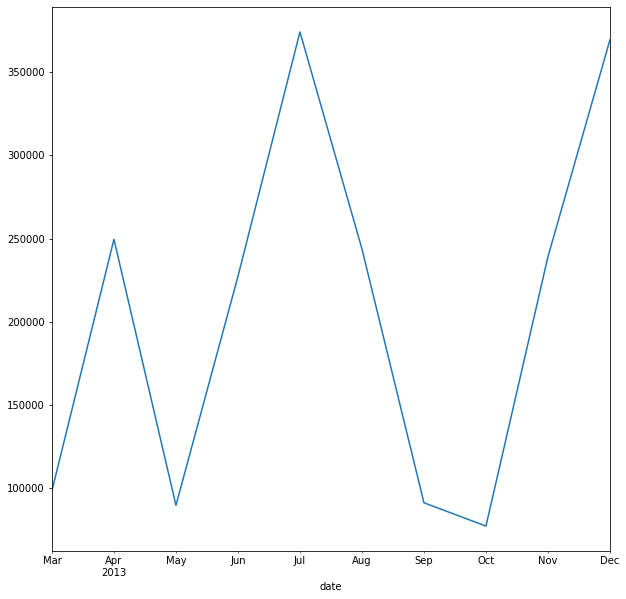

In [ ]:
#transactions for type:HOLIDAY and locale name only including cities
grouper = pd.Grouper(key='date', freq='1M')
df.loc[
       (df['date']>='2013-01-01') & 
       (df['date']<'2014-01-01') &
       (df['type'] == 'Holiday') &
       (df['locale_name'] != 'Ecuador') 
       ].groupby(grouper).sum()['transactions'].plot(figsize= (10,10))



In [ ]:
df.loc[
       (df['date']>='2013-03-01') &
       (df['date'] < '2013-05-01') &
       (df['type'] == 'Holiday') &
       (df['locale_name'] != 'Ecuador')
]['description'].unique() # .nunique()

array(['Fundacion de Manta', 'Provincializacion de Cotopaxi',
       'Fundacion de Cuenca', 'Cantonizacion de Libertad',
       'Cantonizacion de Riobamba'], dtype=object)

In [ ]:
df.loc[
       (df['date']>='2013-05-01') &
       (df['date'] < '2013-07-15') &
       (df['type'] == 'Holiday') &
       (df['locale_name'] != 'Ecuador')
]['description'].unique() # .nunique()

array(['Cantonizacion del Puyo', 'Cantonizacion de Guaranda',
       'Provincializacion de Imbabura', 'Fundacion de Machala',
       'Cantonizacion de Latacunga', 'Cantonizacion de El Carmen',
       'Fundacion de Santo Domingo'], dtype=object)

In [ ]:
df.loc[
       (df['date']>='2013-07-15') &
       (df['date'] < '2013-09-01') &
       (df['type'] == 'Holiday') &
       (df['locale_name'] != 'Ecuador')
]['description'].unique() # .nunique()

array(['Cantonizacion de Cayambe', 'Fundacion de Guayaquil-1',
       'Fundacion de Guayaquil', 'Fundacion de Esmeraldas',
       'Fundacion de Riobamba', 'Fundacion de Ambato'], dtype=object)

Ecuador

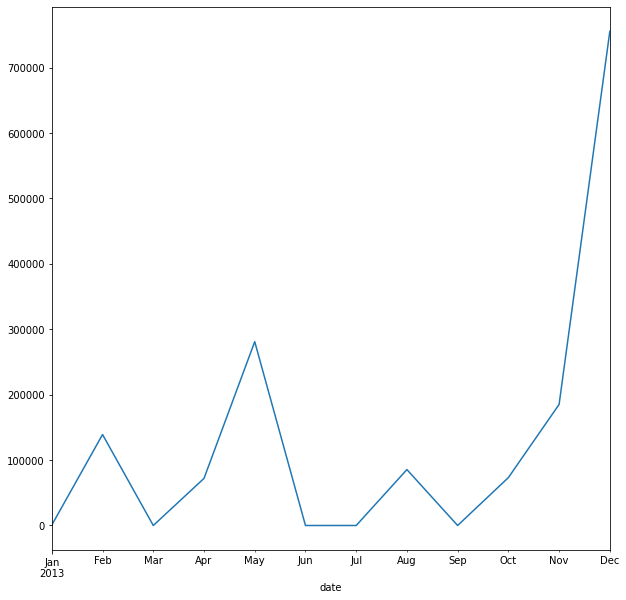

In [ ]:
#transactions for type:HOLIDAY and locale name only ecuador
grouper = pd.Grouper(key='date', freq='1M')
df.loc[
       (df['date']>='2013-01-01') & 
       (df['date']<'2014-01-01') &
       (df['type'] == 'Holiday') &
       (df['locale_name'] == 'Ecuador') 
       ].groupby(grouper).sum()['transactions'].plot(figsize= (10,10))



In [ ]:
#holidays from jan to mid feb
df.loc[
       (df['date']>='2013-01-01') &
       (df['date'] < '2013-02-15') &
       (df['type'] == 'Holiday') &
       (df['locale_name'] == 'Ecuador')
]['description'].unique() # .nunique()

array(['Primer dia del ano', 'Carnaval'], dtype=object)

In [ ]:
#holidays from march to april
df.loc[
       (df['date']>='2013-03-01') &
       (df['date'] < '2013-04-01') &
       (df['type'] == 'Holiday') &
       (df['locale_name'] == 'Ecuador')
]['description'].unique() # .nunique()

array([], dtype=object)

In [ ]:
#holidays from APRIL to MAY
df.loc[
       (df['date']>='2013-04-01') &
       (df['date'] < '2013-05-01') &
       (df['type'] == 'Holiday') &
       (df['locale_name'] == 'Ecuador')
]['description'].unique() # .nunique()

array(['Viernes Santo'], dtype=object)

In [ ]:
#holidays from JULY to AUGUST
df.loc[
       (df['date']>='2013-07-01') &
       (df['date'] < '2013-08-01') &
       (df['type'] == 'Holiday') &
       (df['locale_name'] == 'Ecuador')
]['description'].unique() # .nunique()

array([], dtype=object)

In [ ]:
#holidays from SEPT to DEC
df.loc[
       (df['date']>='2013-08-01') &
       (df['date'] < '2014-01-01') &
       (df['type'] == 'Holiday') &
       (df['locale_name'] == 'Ecuador')
]['description'].unique() # .nunique()

array(['Dia de Difuntos', 'Independencia de Cuenca'], dtype=object)

YEAR: **2013** *EVENTS*

In [ ]:
df.loc[
       (df['date']>='2013-01-01') & 
       (df['date']<'2014-01-01') &
       (df['type'] == 'Event') &
       (df['locale_name'] == 'Ecuador') 
       ]#.groupby(grouper).sum()['transactions']

YEAR: **2016** *HOLIDAYS*

CITY level

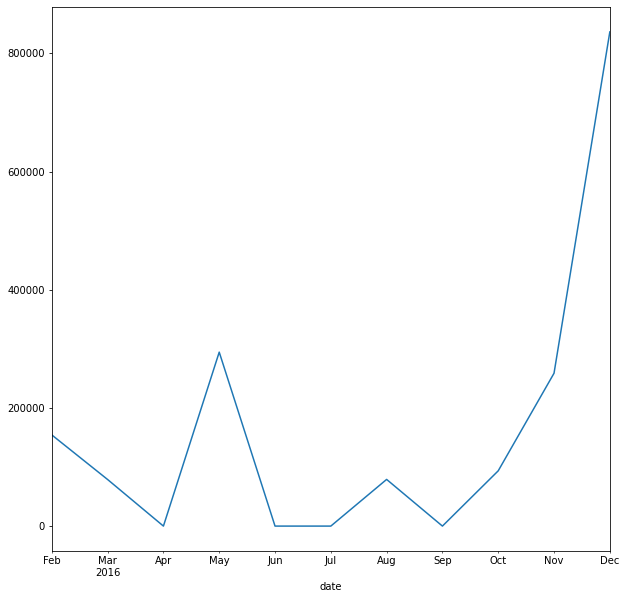

In [ ]:
#transactions for type:HOLIDAY and locale name only including cities
grouper = pd.Grouper(key='date', freq='1M')
df.loc[
       (df['date']>='2016-01-01') & 
       (df['date']<'2017-01-01') &
       (df['type'] == 'Holiday') &
       (df['locale_name'] == 'Ecuador') 
       ].groupby(grouper).sum()['transactions'].plot(figsize= (10,10))



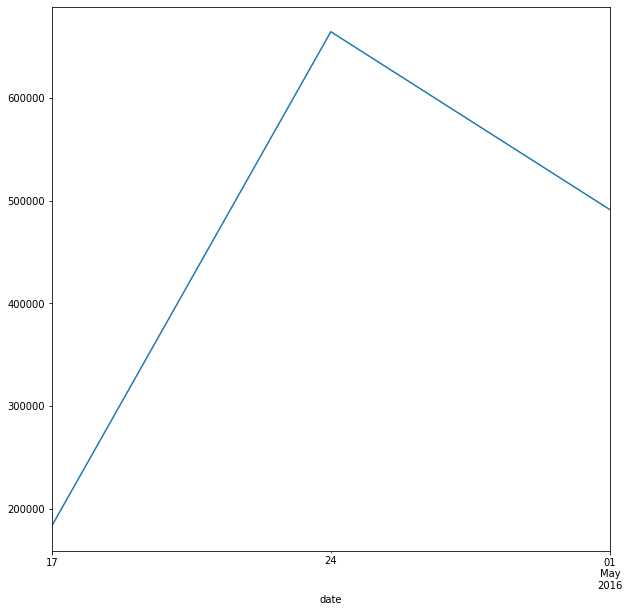

In [ ]:
#transactions for type:HOLIDAY and locale name only including cities
grouper = pd.Grouper(key='date', freq='1W')
df.loc[
       (df['date']>='2016-04-01') & 
       (df['date']<'2016-05-01') &
       (df['type'] == 'Event') &
       (df['locale_name'] == 'Ecuador') 
       ].groupby(grouper).sum()['transactions'].plot(figsize= (10,10))



In [ ]:
#transactions for type:HOLIDAY and locale name only including cities
#grouper = pd.Grouper(key='date', freq='1W')
df.loc[
       (df['date']>='2016-04-01') & 
       (df['date']<'2016-05-01') &
       (df['type'] == 'Holiday') &
       (df['locale_name'] == 'Ecuador') 
       ].value_counts()



Series([], dtype: int64)

In [ ]:
#transactions for type:HOLIDAY and locale name only including cities
grouper = pd.Grouper(key='date', freq='1M')
df.loc[
       (df['date']>='2016-04-01') & 
       (df['date']<'2016-05-01') &
       (df['type'] == 'Holiday') &
       (df['locale_name'] == 'Ecuador') 
       ]



,date,type,locale,locale_name,description,transferred,store_nbr,transactions


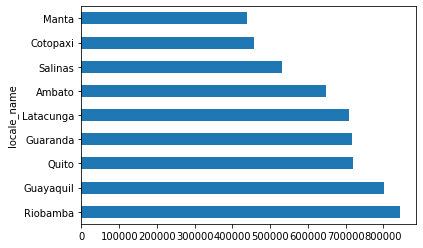

In [ ]:
 df.groupby('locale_name').sum()['transactions'].sort_values(ascending=False)[1:10].plot(kind='barh')

**NEW SECTION**

In [ ]:
test['date'] = pd.to_datetime(test['date'])
grouper = pd.Grouper(key='date', freq='1M')
promos_monthly = pd.DataFrame(test.groupby([grouper, 'store_nbr', 'onpromotion']).count()['item_nbr'])
promos_monthly.reset_index(inplace=True)
promos_monthly.rename(columns={'item_nbr': 'num_items'}, inplace=True)
promos_monthly

,date,store_nbr,onpromotion,num_items
0,2013-01-31,1,False,1283
1,2013-01-31,1,True,98
2,2013-02-28,1,False,1140
3,2013-02-28,1,True,148
4,2013-03-31,1,False,954
...,...,...,...,...
147,2017-07-31,21,True,164
148,2017-07-31,22,False,696
149,2017-07-31,22,True,61
150,2017-08-31,22,False,718


In [ ]:
promos_monthly_pivot = pd.pivot_table(
    promos_monthly,
    index=['date', 'store_nbr'],
    values='num_items',
    columns='onpromotion'
).reset_index()
# promos_monthly_pivot.rename({False: 'nonpromo', True: 'promo'}, inplace=True)
promos_monthly_pivot.columns = ['date', 'store_nbr', 'nonpromo', 'promo']
promos_monthly_pivot['pct_on_promo'] = promos_monthly_pivot['promo']/(promos_monthly_pivot['promo']+promos_monthly_pivot['nonpromo'])
promos_monthly_pivot


,date,store_nbr,nonpromo,promo,pct_on_promo
0,2013-01-31,1,1283.0,98.0,0.070963
1,2013-02-28,1,1140.0,148.0,0.114907
2,2013-03-31,1,954.0,278.0,0.225649
3,2013-03-31,2,182.0,12.0,0.061856
4,2013-04-30,2,1285.0,95.0,0.068841
...,...,...,...,...,...
72,2017-05-31,21,1209.0,155.0,0.113636
73,2017-06-30,21,1321.0,299.0,0.184568
74,2017-07-31,21,753.0,164.0,0.178844
75,2017-07-31,22,696.0,61.0,0.080581


In [ ]:
grouper = pd.Grouper(key='date', freq='1M')
monthly_transactions_holidays = pd.DataFrame(df.groupby([grouper, 'store_nbr']).sum()['transactions']).reset_index()
monthly_transactions_holidays

,date,store_nbr,transactions
0,2013-01-31,25.0,770.0
1,2013-02-28,1.0,883.0
2,2013-02-28,2.0,3212.0
3,2013-02-28,3.0,5546.0
4,2013-02-28,4.0,2714.0
...,...,...,...
2549,2017-08-31,50.0,8823.0
2550,2017-08-31,51.0,5016.0
2551,2017-08-31,52.0,7257.0
2552,2017-08-31,53.0,3206.0


In [ ]:
df.head()

,date,type,locale,locale_name,description,transferred,store_nbr,transactions
40,2013-01-01,Holiday,National,Ecuador,Primer dia del ano,False,25.0,770.0
41,2013-02-11,Holiday,National,Ecuador,Carnaval,False,1.0,396.0
42,2013-02-11,Holiday,National,Ecuador,Carnaval,False,2.0,1486.0
43,2013-02-11,Holiday,National,Ecuador,Carnaval,False,3.0,2532.0
44,2013-02-11,Holiday,National,Ecuador,Carnaval,False,4.0,1263.0


In [ ]:
df1 = pd.merge(
    left=promos_monthly_pivot,
    right=monthly_transactions_holidays,
    left_on=['date', 'store_nbr'],
    right_on=['date', 'store_nbr'],
    how='left'
)
df1

,date,store_nbr,nonpromo,promo,pct_on_promo,transactions
0,2013-01-31,1,1283.0,98.0,0.070963,NaN
1,2013-02-28,1,1140.0,148.0,0.114907,883.0
2,2013-03-31,1,954.0,278.0,0.225649,1332.0
3,2013-03-31,2,182.0,12.0,0.061856,2051.0
4,2013-04-30,2,1285.0,95.0,0.068841,9065.0
...,...,...,...,...,...,...
72,2017-05-31,21,1209.0,155.0,0.113636,6263.0
73,2017-06-30,21,1321.0,299.0,0.184568,5148.0
74,2017-07-31,21,753.0,164.0,0.178844,5846.0
75,2017-07-31,22,696.0,61.0,0.080581,3929.0


In [ ]:
#transactions for type:HOLIDAY and locale name only including cities
grouper = pd.Grouper(key='date', freq='1M')
df1.loc[
       (df['date']>='2013-01-01') & 
       (df['date']<'2017-09-01') &
       (df['store_nbr'] == '1') 
       ].groupby(grouper).sum()['promo'].plot(figsize= (10,10))



IndexingError: ignored